# Filling an image with a repeating block of random numbers

Drawing several million of random numbers of a random number generator is relatively slow operation.
The goal of this notebook to test the timing of using numpy's random number generator vs. an array of pre-generated random numbers. The random array is used repeatedly to fill the target.

## Summary

While the usage of pre-generated random array is faster, if the pre-generated data amount is smaller than the destination image size, unsurprisingly the repetition produces patterns - this is not good, this can appear in the Fourier transform. Probably we don't want this implemented in the stack unless the random number generation is a measurable bottleneck.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RandomNormalRing:
    """A class to store a block of pre-generated normal random data in an array.
    The random array is used with a rolling index from the beginning to the end then start again.
    """
    def __init__(self, size= 1024*1024, seed=None):
        G = np.random.default_rng(seed)
        self.ring = G.normal(size=size)
        self.ringIndex = 0
        self.ringSize = size
    
#     def testInit(self):
#         self.ring = np.arange(100)
#         self.ringIndex = 0
#         self.ringSize = self.ring.size
    
    def fill(self, A):
        """Fill A from the random array."""
        li = 0  # Left index in A
        for ri in range(self.ringSize - self.ringIndex, A.size, self.ringSize):
            A.flat[li:ri] = self.ring[self.ringIndex:]
#             print(li, ri, self.ringIndex)
            li = ri
            self.ringIndex = 0

        # The remaining chunk in A can now be filled from the ring
        ri = A.size - li
        ringIndexNew = self.ringIndex + ri
        A.flat[li:] = self.ring[self.ringIndex:ringIndexNew]
#         print("Final:",li, ri, self.ringIndex, ringIndexNew)
        self.ringIndex = ringIndexNew

## Ring is smaller than target image

In [3]:
# If the ring is significantly smaller than the image, the pattern is quite obvious
RR = RandomNormalRing(128*10)
A = np.zeros(shape=(1024,1024,4), dtype=float)

In [5]:
%time RR.fill(A)

CPU times: user 16.9 ms, sys: 8.47 ms, total: 25.4 ms
Wall time: 25.2 ms


In [6]:
G= np.random.default_rng()

In [7]:
%time A[...] = G.normal(size=A.shape)

CPU times: user 48.7 ms, sys: 3.95 ms, total: 52.7 ms
Wall time: 53.1 ms


------

In [9]:
A = np.zeros(shape=(128,128), dtype=float)
RR.fill(A)

<IPython.core.display.Javascript object>


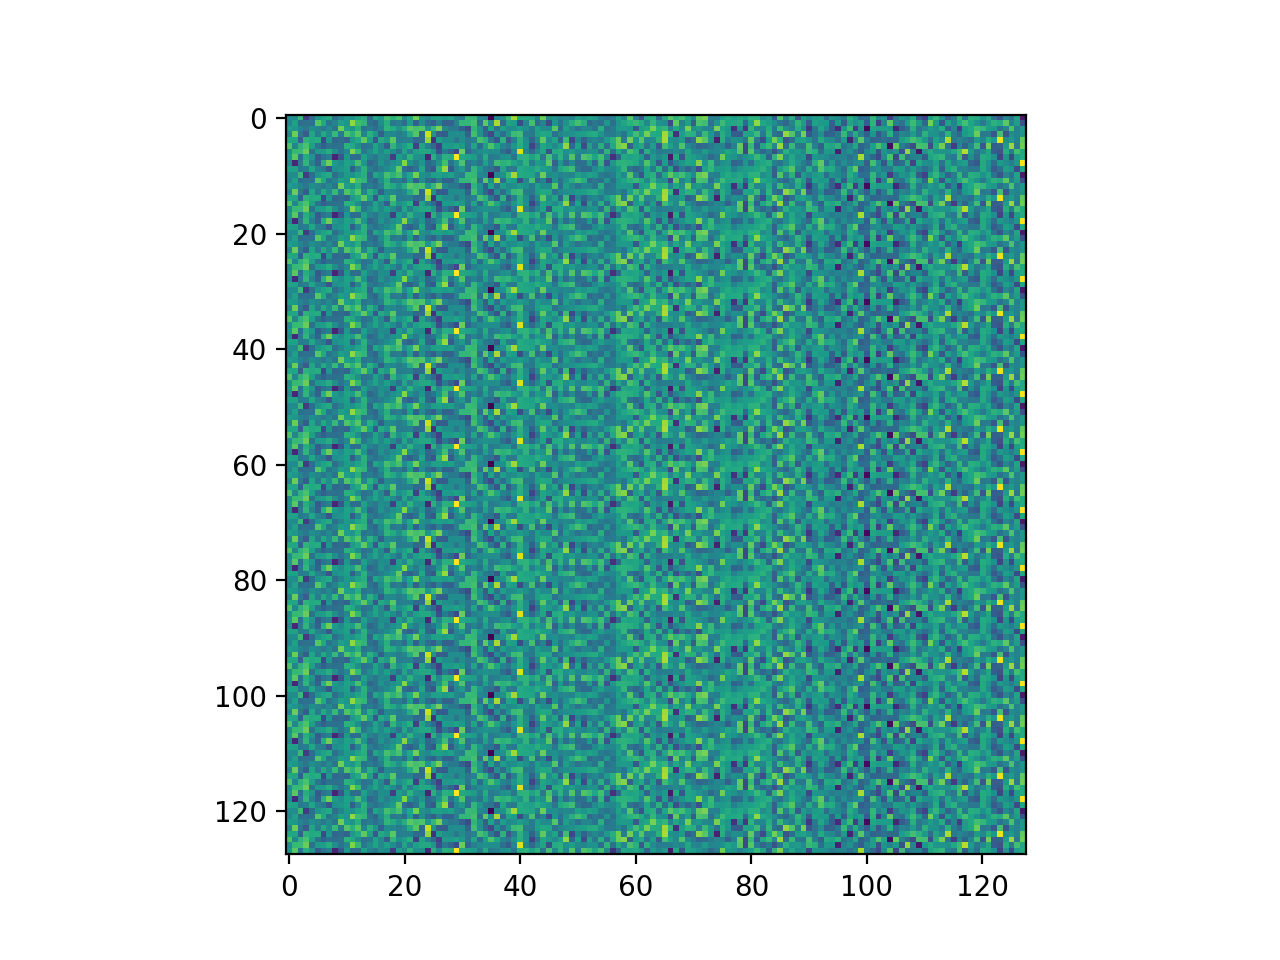

In [11]:
fig, ax = plt.subplots()
ax.imshow(A,interpolation='none')

------

## Ring is larger than target image

In [13]:
# If the ring is significantly smaller than the image, the pattern is quite obvious
RR = RandomNormalRing(1024*1024*2)
A = np.zeros(shape=(1024,1024,4), dtype=float)

In [14]:
%time RR.fill(A)

CPU times: user 11.3 ms, sys: 12.3 ms, total: 23.6 ms
Wall time: 23.3 ms


In [15]:
G= np.random.default_rng()

In [16]:
%time A[...] = G.normal(size=A.shape)

CPU times: user 86.5 ms, sys: 8.01 ms, total: 94.6 ms
Wall time: 91.9 ms


------

In [17]:
A = np.zeros(shape=(1024,1024), dtype=float)
RR.fill(A)

<IPython.core.display.Javascript object>


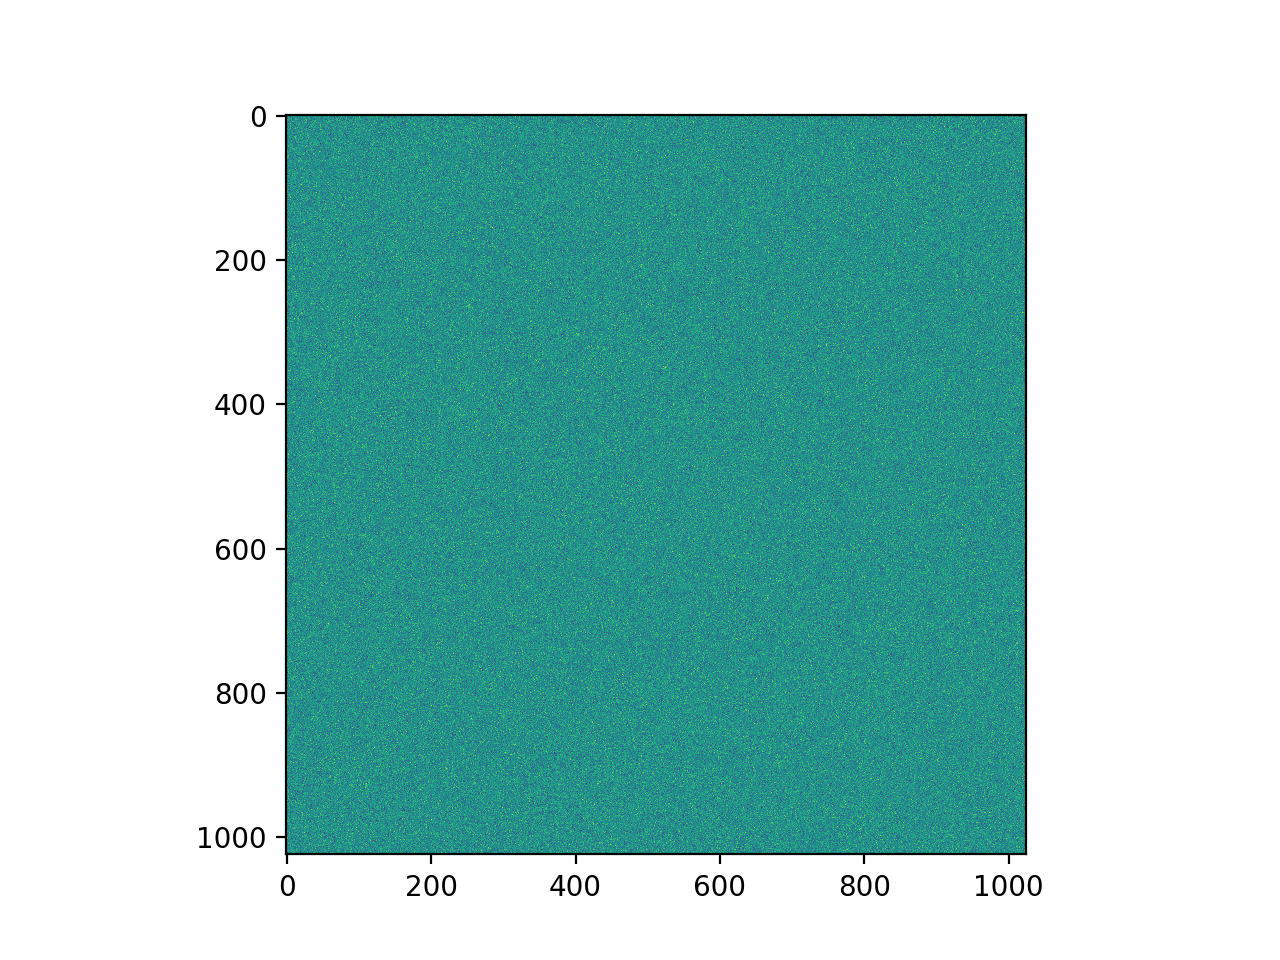

In [18]:
fig, ax = plt.subplots()
ax.imshow(A,interpolation='none')